In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Load cleaned dataset
df = pd.read_csv("amazon_delivery_cleaned.csv")

# View first rows
df.head()


,order_id,agent_age,agent_rating,store_latitude,store_longitude,drop_latitude,drop_longitude,order_date,order_time,pickup_time,weather,traffic,vehicle,area,delivery_time,category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,Motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,Scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,Motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,Motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,Scooter,Metropolitian,150,Toys


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43685 entries, 0 to 43684
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         43685 non-null  object 
 1   agent_age        43685 non-null  int64  
 2   agent_rating     43685 non-null  float64
 3   store_latitude   43685 non-null  float64
 4   store_longitude  43685 non-null  float64
 5   drop_latitude    43685 non-null  float64
 6   drop_longitude   43685 non-null  float64
 7   order_date       43685 non-null  object 
 8   order_time       43594 non-null  object 
 9   pickup_time      43685 non-null  object 
 10  weather          43594 non-null  object 
 11  traffic          43685 non-null  object 
 12  vehicle          43685 non-null  object 
 13  area             43685 non-null  object 
 14  delivery_time    43685 non-null  int64  
 15  category         43685 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 3.8+ MB


In [4]:
df.isnull().sum()


order_id            0
agent_age           0
agent_rating        0
store_latitude      0
store_longitude     0
drop_latitude       0
drop_longitude      0
order_date          0
order_time         91
pickup_time         0
weather            91
traffic             0
vehicle             0
area                0
delivery_time       0
category            0
dtype: int64

In [5]:
median_delivery_time = df["delivery_time"].median()
median_delivery_time


np.float64(125.0)

In [6]:
df["delayed"] = df["delivery_time"] > median_delivery_time
df["delayed"].value_counts()


delayed
False    23170
True     20515
Name: count, dtype: int64

In [7]:
delay_by_traffic = (
    df[df["delayed"]]
    .groupby("traffic")
    .size()
    .reset_index(name="delay_count")
)

delay_by_traffic


,traffic,delay_count
0,High,2408
1,Jam,9023
2,Low,3555
3,Medium,5489
4,Nan,40


In [8]:
delay_by_traffic["percentage"] = (
    delay_by_traffic["delay_count"] /
    delay_by_traffic["delay_count"].sum()
) * 100

delay_by_traffic


,traffic,delay_count,percentage
0,High,2408,11.737753
1,Jam,9023,43.982452
2,Low,3555,17.328784
3,Medium,5489,26.756032
4,Nan,40,0.194979


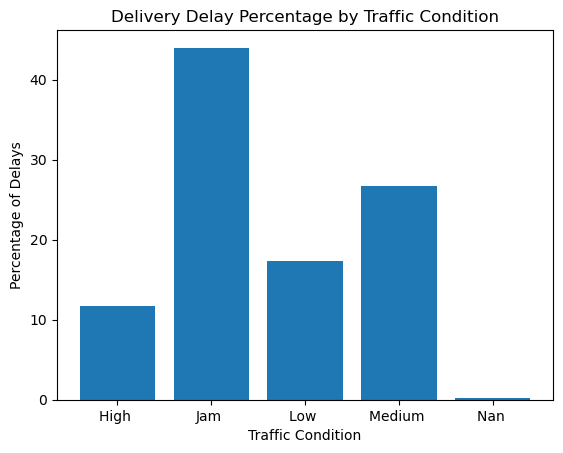

In [9]:
plt.figure()
plt.bar(
    delay_by_traffic["traffic"],
    delay_by_traffic["percentage"]
)

plt.xlabel("Traffic Condition")
plt.ylabel("Percentage of Delays")
plt.title("Delivery Delay Percentage by Traffic Condition")

plt.show()


In [10]:
for index, row in delay_by_traffic.iterrows():
    print(
        f"Traffic: {row['traffic']} | "
        f"Delay Contribution: {row['percentage']:.2f}%"
    )


Traffic: High  | Delay Contribution: 11.74%
Traffic: Jam  | Delay Contribution: 43.98%
Traffic: Low  | Delay Contribution: 17.33%
Traffic: Medium  | Delay Contribution: 26.76%
Traffic: Nan  | Delay Contribution: 0.19%
